# Import Modules

In [11]:
import h2o
import pandas
import random
from PIL import Image

In [12]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
project_path="/gtc-2017"

# Connect or Start H2O

In [14]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,35 mins 11 secs
H2O cluster version:,3.11.0.230
H2O cluster version age:,14 hours and 21 minutes
H2O cluster name:,root
H2O cluster total nodes:,1
H2O cluster free memory:,26.45 Gb
H2O cluster total cores:,20
H2O cluster allowed cores:,20
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


# Import Data

In [15]:
cars = h2o.import_file(project_path+"/data/cars_train.csv", header=1, destination_frame="cars")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
cars["label"] = cars["label"].asfactor()

# Explore Data

In [17]:
cars.head()

uri,label
/gtc-2017/data/cars_train_resized/00001.jpg,truck
/gtc-2017/data/cars_train_resized/00002.jpg,truck
/gtc-2017/data/cars_train_resized/00004.jpg,car
/gtc-2017/data/cars_train_resized/00005.jpg,car
/gtc-2017/data/cars_train_resized/00007.jpg,car
/gtc-2017/data/cars_train_resized/00008.jpg,truck
/gtc-2017/data/cars_train_resized/00009.jpg,truck
/gtc-2017/data/cars_train_resized/00010.jpg,car
/gtc-2017/data/cars_train_resized/00011.jpg,car
/gtc-2017/data/cars_train_resized/00013.jpg,car


# Test GPU Driver

In [18]:
!nvidia-smi

Tue May  9 03:54:39 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 378.13                 Driver Version: 378.13                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 0000:02:00.0      On |                  N/A |
| 27%   37C    P8    12W / 180W |   4740MiB /  8112MiB |     20%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Build Deep Water Model

This Deep Water model is just loading a pre-trained Inception with Batch Normalization network.  No additional training is acutally done (i.e. epochs=0).

In [19]:
from h2o.estimators.deepwater import H2ODeepWaterEstimator
model = H2ODeepWaterEstimator(epochs=0,
                              mini_batch_size=32,
                              network="user",
                              network_definition_file=project_path+"/models/Inception_BN-symbol.json",
                              network_parameters_file=project_path+"/models/Inception_BN-0039.params",
                              mean_image_file=project_path+"/models/mean_224.nd",
                              image_shape=[224,224],
                              channels=3)
model.train(x="uri", y="label", training_frame=cars)

deepwater Model Build progress: |█████████████████████████████████████████| 100%


# Extract Deep Features from Model

In [20]:
extracted_features = model.deepfeatures(cars, "global_pool_output")

deepfeatures progress: |██████████████████████████████████████████████████| 100%


Explore the dimensionality of the deep feature and view a few samples.

In [21]:
extracted_features.dim

[6215, 1024]

In [22]:
print(extracted_features[0:4,:])

DF.global_pool_output.C1 DF.global_pool_output.C2 DF.global_pool_output.C3 DF.global_pool_output.C4 DF.global_pool_output.C5 DF.global_pool_output.C6 DF.global_pool_output.C7 DF.global_pool_output.C8 DF.global_pool_output.C9 DF.global_pool_output.C10 DF.global_pool_output.C11 DF.global_pool_output.C12 DF.global_pool_output.C13 DF.global_pool_output.C14 DF.global_pool_output.C15 DF.global_pool_output.C16 DF.global_pool_output.C17 DF.global_pool_output.C18 DF.global_pool_output.C19 DF.global_pool_output.C20 DF.global_pool_output.C21 DF.global_pool_output.C22 DF.global_pool_output.C23 DF.global_pool_output.C24 DF.global_pool_output.C25 DF.global_pool_output.C26 DF.global_pool_output.C27 DF.global_pool_output.C28 DF.global_pool_output.C29 DF.global_pool_output.C30 DF.global_pool_output.C31 DF.global_pool_output.C32 DF.global_pool_output.C33 DF.global_pool_output.C34 DF.global_pool_output.C35 DF.global_pool_output.C36 DF.global_pool_output.C37 DF.global_pool_output.C38 DF.global_pool_output.C39 DF.global_pool_output.C40 DF.global_pool_output.C41 DF.global_pool_output.C42 DF.global_pool_output.C43 DF.global_pool_output.C44 DF.global_pool_output.C45 DF.global_pool_output.C46 DF.global_pool_output.C47 DF.global_pool_output.C48 DF.global_pool_output.C49 DF.global_pool_output.C50 DF.global_pool_output.C51 DF.global_pool_output.C52 DF.global_pool_output.C53 DF.global_pool_output.C54 DF.global_pool_output.C55 DF.global_pool_output.C56 DF.global_pool_output.C57 DF.global_pool_output.C58 DF.global_pool_output.C59 DF.global_pool_output.C60 DF.global_pool_output.C61 DF.global_pool_output.C62 DF.global_pool_output.C63 DF.global_pool_output.C64 DF.global_pool_output.C65 DF.global_pool_output.C66 DF.global_pool_output.C67 DF.global_pool_output.C68 DF.global_pool_output.C69 DF.global_pool_output.C70 DF.global_pool_output.C71 DF.global_pool_output.C72 DF.global_pool_output.C73 DF.global_pool_output.C74 DF.global_pool_output.C75 DF.global_pool_output.C76 DF.global_pool_output.C77 DF.global_pool_output.C78 DF.global_pool_output.C79 DF.global_pool_output.C80 DF.global_pool_output.C81 DF.global_pool_output.C82 DF.global_pool_output.C83 DF.global_pool_output.C84 DF.global_pool_output.C85 DF.global_pool_output.C86 DF.global_pool_output.C87 DF.global_pool_output.C88 DF.global_pool_output.C89 DF.global_pool_output.C90 DF.global_pool_output.C91 DF.global_pool_output.C92 DF.global_pool_output.C93 DF.global_pool_output.C94 DF.global_pool_output.C95 DF.global_pool_output.C96 DF.global_pool_output.C97 DF.global_pool_output.C98 DF.global_pool_output.C99 DF.global_pool_output.C100 DF.global_pool_output.C101 DF.global_pool_output.C102 DF.global_pool_output.C103 DF.global_pool_output.C104 DF.global_pool_output.C105 DF.global_pool_output.C106 DF.global_pool_output.C107 DF.global_pool_output.C108 DF.global_pool_output.C109 DF.global_pool_output.C110 DF.global_pool_output.C111 DF.global_pool_output.C112 DF.global_pool_output.C113 DF.global_pool_output.C114 DF.global_pool_output.C115 DF.global_pool_output.C116 DF.global_pool_output.C117 DF.global_pool_output.C118 DF.global_pool_output.C119 DF.global_pool_output.C120 DF.global_pool_output.C121 DF.global_pool_output.C122 DF.global_pool_output.C123 DF.global_pool_output.C124 DF.global_pool_output.C125 DF.global_pool_output.C126 DF.global_pool_output.C127 DF.global_pool_output.C128 DF.global_pool_output.C129 DF.global_pool_output.C130 DF.global_pool_output.C131 DF.global_pool_output.C132 DF.global_pool_output.C133 DF.global_pool_output.C134 DF.global_pool_output.C135 DF.global_pool_output.C136 DF.global_pool_output.C137 DF.global_pool_output.C138 DF.global_pool_output.C139 DF.global_pool_output.C140 DF.global_pool_output.C141 DF.global_pool_output.C142 DF.global_pool_output.C143 DF.global_pool_output.C144 DF.global_pool_output.C145 DF.global_pool_output.C146 DF.global_pool_output.C147 DF.global_pool_output.C148 DF.global_pool_output.C149 DF.global_pool_output.C150 DF.global_pool_output.C151 DF.global_pool_output.C152 DF.g

# Run Similarity Analysis

Select the number of images to be the reference.

In [23]:
num_ref_images = 3

Sample specified number of images from the data set.

In [24]:
pd_cars = cars.as_data_frame()
pd_cars_sample = pd_cars.sample(n=num_ref_images, random_state=1234)

In [25]:
pd_cars_sample

,uri,label
5261,/gtc-2017/data/cars_train_resized/06910.jpg,truck
1941,/gtc-2017/data/cars_train_resized/02547.jpg,car
3165,/gtc-2017/data/cars_train_resized/04135.jpg,truck


Just some code to keep track of the reference image indices and values as well as the non-reference images.

In [26]:
list_cars_sample_label = pd_cars_sample["label"].tolist()
list_cars_sample_index = pd_cars_sample.index.values.tolist()
list_cars_sample_index.sort()
list_cars_all_index = pd_cars.index.values.tolist()
set_not_sample_index = set(list_cars_all_index).symmetric_difference(set(list_cars_sample_index))
list_cars_not_sample_index = list(set_not_sample_index)

In [27]:
ref_images = cars[list_cars_sample_index]

Let's take a look at the reference images.

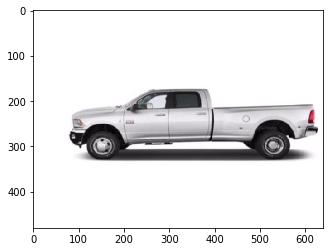

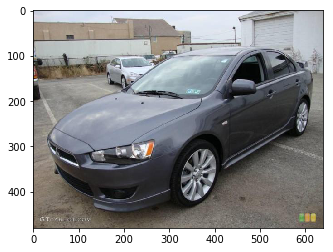

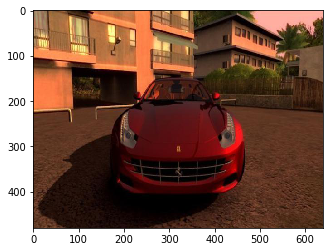

In [28]:
for i in list_cars_sample_index:
    uri = cars[i,"uri"]
    img=mpimg.imread(uri)
    imgplot = plt.imshow(img, cmap="Greys")
    plt.show()

Divide the extracted deep feature set into the reference images and the "rest".

In [29]:
ref_cars_features = extracted_features[list_cars_sample_index,:]
rest_cars_features = extracted_features[list_cars_not_sample_index,:]
h2o.assign(ref_cars_features, "ref_cars_features")
h2o.assign(rest_cars_features, "rest_cars_features")

DF.global_pool_output.C1 DF.global_pool_output.C2 DF.global_pool_output.C3 DF.global_pool_output.C4 DF.global_pool_output.C5 DF.global_pool_output.C6 DF.global_pool_output.C7 DF.global_pool_output.C8 DF.global_pool_output.C9 DF.global_pool_output.C10 DF.global_pool_output.C11 DF.global_pool_output.C12 DF.global_pool_output.C13 DF.global_pool_output.C14 DF.global_pool_output.C15 DF.global_pool_output.C16 DF.global_pool_output.C17 DF.global_pool_output.C18 DF.global_pool_output.C19 DF.global_pool_output.C20 DF.global_pool_output.C21 DF.global_pool_output.C22 DF.global_pool_output.C23 DF.global_pool_output.C24 DF.global_pool_output.C25 DF.global_pool_output.C26 DF.global_pool_output.C27 DF.global_pool_output.C28 DF.global_pool_output.C29 DF.global_pool_output.C30 DF.global_pool_output.C31 DF.global_pool_output.C32 DF.global_pool_output.C33 DF.global_pool_output.C34 DF.global_pool_output.C35 DF.global_pool_output.C36 DF.global_pool_output.C37 DF.global_pool_output.C38 DF.global_pool_output.C39 DF.global_pool_output.C40 DF.global_pool_output.C41 DF.global_pool_output.C42 DF.global_pool_output.C43 DF.global_pool_output.C44 DF.global_pool_output.C45 DF.global_pool_output.C46 DF.global_pool_output.C47 DF.global_pool_output.C48 DF.global_pool_output.C49 DF.global_pool_output.C50 DF.global_pool_output.C51 DF.global_pool_output.C52 DF.global_pool_output.C53 DF.global_pool_output.C54 DF.global_pool_output.C55 DF.global_pool_output.C56 DF.global_pool_output.C57 DF.global_pool_output.C58 DF.global_pool_output.C59 DF.global_pool_output.C60 DF.global_pool_output.C61 DF.global_pool_output.C62 DF.global_pool_output.C63 DF.global_pool_output.C64 DF.global_pool_output.C65 DF.global_pool_output.C66 DF.global_pool_output.C67 DF.global_pool_output.C68 DF.global_pool_output.C69 DF.global_pool_output.C70 DF.global_pool_output.C71 DF.global_pool_output.C72 DF.global_pool_output.C73 DF.global_pool_output.C74 DF.global_pool_output.C75 DF.global_pool_output.C76 DF.global_pool_output.C77 DF.global_pool_output.C78 DF.global_pool_output.C79 DF.global_pool_output.C80 DF.global_pool_output.C81 DF.global_pool_output.C82 DF.global_pool_output.C83 DF.global_pool_output.C84 DF.global_pool_output.C85 DF.global_pool_output.C86 DF.global_pool_output.C87 DF.global_pool_output.C88 DF.global_pool_output.C89 DF.global_pool_output.C90 DF.global_pool_output.C91 DF.global_pool_output.C92 DF.global_pool_output.C93 DF.global_pool_output.C94 DF.global_pool_output.C95 DF.global_pool_output.C96 DF.global_pool_output.C97 DF.global_pool_output.C98 DF.global_pool_output.C99 DF.global_pool_output.C100 DF.global_pool_output.C101 DF.global_pool_output.C102 DF.global_pool_output.C103 DF.global_pool_output.C104 DF.global_pool_output.C105 DF.global_pool_output.C106 DF.global_pool_output.C107 DF.global_pool_output.C108 DF.global_pool_output.C109 DF.global_pool_output.C110 DF.global_pool_output.C111 DF.global_pool_output.C112 DF.global_pool_output.C113 DF.global_pool_output.C114 DF.global_pool_output.C115 DF.global_pool_output.C116 DF.global_pool_output.C117 DF.global_pool_output.C118 DF.global_pool_output.C119 DF.global_pool_output.C120 DF.global_pool_output.C121 DF.global_pool_output.C122 DF.global_pool_output.C123 DF.global_pool_output.C124 DF.global_pool_output.C125 DF.global_pool_output.C126 DF.global_pool_output.C127 DF.global_pool_output.C128 DF.global_pool_output.C129 DF.global_pool_output.C130 DF.global_pool_output.C131 DF.global_pool_output.C132 DF.global_pool_output.C133 DF.global_pool_output.C134 DF.global_pool_output.C135 DF.global_pool_output.C136 DF.global_pool_output.C137 DF.global_pool_output.C138 DF.global_pool_output.C139 DF.global_pool_output.C140 DF.global_pool_output.C141 DF.global_pool_output.C142 DF.global_pool_output.C143 DF.global_pool_output.C144 DF.global_pool_output.C145 DF.global_pool_output.C146 DF.global_pool_output.C147 DF.global_pool_output.C148 DF.global_pool_output.C149 DF.global_pool_output.C150 DF.global_pool_output.C151 DF.global_pool_output.C152 DF.g

Run the "distance" function to compute the similarity between each reference image and the rest of the set.  The similarity measure can be: `"cosine"`, `"cosine_sq"`, `"l1"` or `"l2"`.

In [30]:
similarities = rest_cars_features.distance(ref_cars_features, "cosine")
similarities.head()

C1,C2,C3
0.590881,0.794158,0.64161
0.533706,0.85232,0.683769
0.649205,0.592522,0.567105
0.667465,0.718721,0.539415
0.549599,0.763301,0.663387
0.680874,0.729574,0.645605
0.602204,0.799885,0.628618
0.707784,0.748934,0.638747
0.71126,0.768408,0.638957
0.529658,0.802187,0.650787


Sort the similarity data frame (most similar to least) on the first reference image (this can be changed by changing the `"by"` argument).

In [31]:
pd_similarities = similarities.as_data_frame()
pd_similarities.sort_values(by="C1", ascending=False, inplace=True)
pd_similarities.head()

,C1,C2,C3
2331,0.908344,0.620457,0.482137
3277,0.906424,0.607805,0.470332
2011,0.888055,0.629710,0.492060
3993,0.865295,0.615310,0.464084
2527,0.863013,0.640212,0.496944


Show the most similar images.

6212


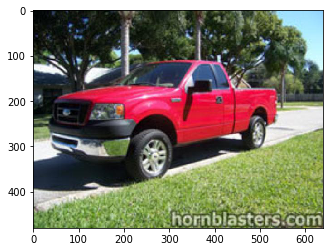

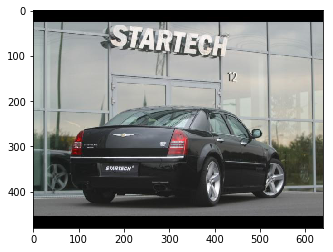

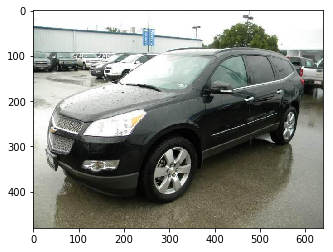

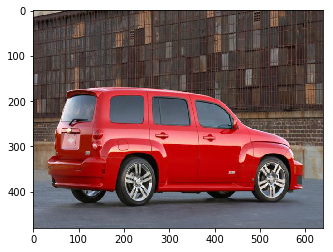

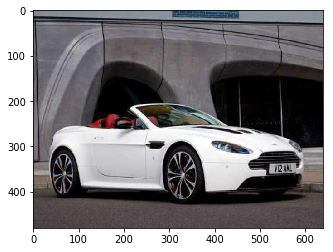

In [32]:
list_similiar = pd_similarities["C1"].index.values.tolist()
print(len(list_similiar))

for i in list_similiar[0:5]:
    uri = cars[i,"uri"]
    img=mpimg.imread(uri)
    imgplot = plt.imshow(img, cmap="Greys")
    plt.show()

Show the least similar images.

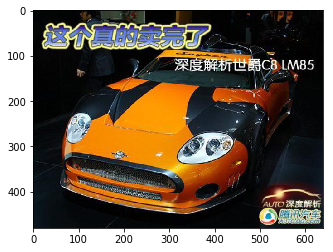

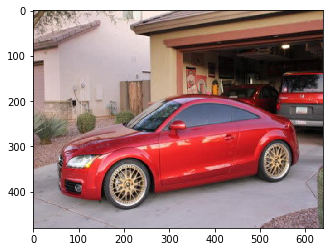

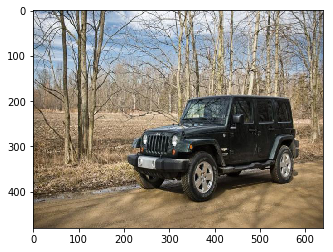

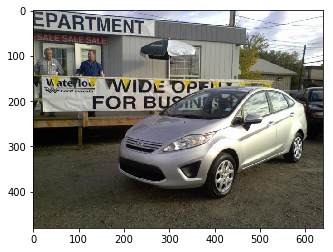

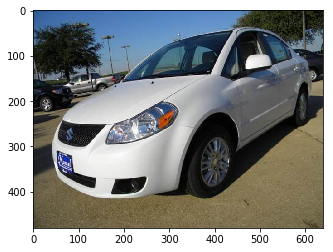

In [33]:
for i in list_similiar[6200:6205]:
    uri = cars[i,"uri"]
    img=mpimg.imread(uri)
    imgplot = plt.imshow(img, cmap="Greys")
    plt.show()